In [1]:
import pymysql
import pandas as pd

## Aux Functions

In [13]:
# Function to display the structure of a table
def describe_table(table_name):
    print(f"\n === Table structure for '{table_name}' ===")
    cursor.execute(f"DESCRIBE {table_name};")
    df_desc = pd.DataFrame(cursor.fetchall(), columns=["Field", "Type", "Null", "Key", "Default", "Extra"])
    display(df_desc)  # Works only in Jupyter, if not using Jupyter, change to print(df_desc.to_string())

# Function to display sample rows from a table
def show_sample_rows(table_name, limit=5):
    print(f"\n === {limit} rows from '{table_name}' ===")
    query = f"SELECT * FROM {table_name} LIMIT {limit};"
    cursor.execute(query)
    rows = cursor.fetchall()
    
    if rows:
        df_rows = pd.DataFrame(rows, columns=[desc[0] for desc in cursor.description])
        display(df_rows)  # For a nicer display in Jupyter
    else:
        print("The table is empty.")

def run_query(query, connection):
    """Executes an SQL query and returns the results as a pandas DataFrame."""
    cursor = connection.cursor()
    cursor.execute(query)
    df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
    cursor.close()
    return df

def show_query(query, connection):
    """Executes the query and displays the result in a formatted way."""
    df = run_query(query, connection)
    display(df)

import matplotlib.pyplot as plt
import seaborn as sns

# Statistical summary of key tables
def display_summary(df, name):
    print(f"\n📊 Summary of table '{name}':")
    df_filtered = df.select_dtypes(include=['number']).drop(columns=[col for col in df.columns if col.endswith('_id')], errors='ignore')
    
    if df_filtered.empty:
        print("No numerical data available for analysis in this table.")
        return
    
    display(df_filtered.describe())
    
    # Boxplot for each numerical column excluding IDs
    plt.figure(figsize=(12, 5))
    sns.boxplot(data=df_filtered)
    plt.title(f"Boxplot of numerical variables in {name}")
    plt.xticks(rotation=90)
    plt.show()
    
    # Histograms of numerical variables excluding IDs
    df_filtered.hist(figsize=(12, 8), bins=20)
    plt.suptitle(f"Distribution of numerical variables in {name}")
    plt.show()
    
    # Correlation heatmap
    if df_filtered.shape[1] > 1:
        plt.figure(figsize=(10,6))
        sns.heatmap(df_filtered.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
        plt.title(f"Correlation Heatmap in {name}")
        plt.show()


## Checking loaded data

In [28]:
connection = pymysql.connect(
    host='mariadb',    
    user='futbol_user',
    password='futbol_pass',
    database='futbol_db',
    port=3306             
)

cursor = connection.cursor()
print("Succesfully connected")

Succesfully connected


In [14]:
tables_to_check = ["teams", "locations", "tournaments", "matches", "players", "shootouts", "goals"]

print("Database Verification:\n")

# Display all tables in the database
cursor.execute("SHOW TABLES;")
all_tables = [table[0] for table in cursor.fetchall()]
print("Tables found in the database:")
for table in all_tables:
    print(f" - {table}")

# Verify structure and content of each table
for table in tables_to_check:
    if table in all_tables:
        describe_table(table)
        show_sample_rows(table)

Database Verification:

Tables found in the database:
 - goals
 - locations
 - matches
 - players
 - shootouts
 - teams
 - tournaments

 === Table structure for 'teams' ===


,Field,Type,Null,Key,Default,Extra
0,team_id,int(11),NO,PRI,None,auto_increment
1,team_name,varchar(100),NO,UNI,None,



 === 5 rows from 'teams' ===


,team_id,team_name
0,295,Abkhazia
1,98,Afghanistan
2,234,Åland Islands
3,105,Albania
4,16,Alderney



 === Table structure for 'locations' ===


,Field,Type,Null,Key,Default,Extra
0,location_id,int(11),NO,PRI,None,auto_increment
1,city,varchar(255),NO,,None,
2,country,varchar(255),NO,,None,



 === 5 rows from 'locations' ===


,location_id,city,country
0,1,Glasgow,Scotland
1,2,London,England
2,3,Wrexham,Wales
3,4,Blackburn,England
4,5,Belfast,Northern Ireland



 === Table structure for 'tournaments' ===


,Field,Type,Null,Key,Default,Extra
0,tournament_id,int(11),NO,PRI,None,auto_increment
1,name,varchar(255),NO,UNI,None,



 === 5 rows from 'tournaments' ===


,tournament_id,name
0,141,ABCS Tournament
1,35,AFC Asian Cup
2,33,AFC Asian Cup qualification
3,132,AFC Challenge Cup
4,136,AFC Challenge Cup qualification



 === Table structure for 'matches' ===


,Field,Type,Null,Key,Default,Extra
0,match_id,int(11),NO,PRI,None,auto_increment
1,date,date,NO,,None,
2,home_team_id,int(11),NO,MUL,None,
3,away_team_id,int(11),NO,MUL,None,
4,home_score,int(11),NO,,None,
5,away_score,int(11),NO,,None,
6,tournament_id,int(11),YES,MUL,None,
7,location_id,int(11),YES,MUL,None,
8,neutral,tinyint(1),NO,,None,



 === 5 rows from 'matches' ===


,match_id,date,home_team_id,away_team_id,home_score,away_score,tournament_id,location_id,neutral
0,1,1872-11-30,1,2,0,0,1,1,0
1,2,1873-03-08,2,1,4,2,1,2,0
2,3,1874-03-07,1,2,2,1,1,1,0
3,4,1875-03-06,2,1,2,2,1,2,0
4,5,1876-03-04,1,2,3,0,1,1,0



 === Table structure for 'players' ===


,Field,Type,Null,Key,Default,Extra
0,player_id,int(11),NO,PRI,None,auto_increment
1,player_name,varchar(255),NO,,None,
2,team_id,int(11),YES,MUL,None,



 === 5 rows from 'players' ===


,player_id,player_name,team_id
0,1,José Piendibene,7
1,2,Isabelino Gradín,7
2,3,Alberto Ohaco,8
3,4,Telésforo Báez,25
4,5,Juan Domingo Brown,8



 === Table structure for 'shootouts' ===


,Field,Type,Null,Key,Default,Extra
0,shootout_id,int(11),NO,PRI,None,auto_increment
1,match_id,int(11),NO,MUL,None,
2,winner_team_id,int(11),NO,MUL,None,
3,first_shooter_team_id,int(11),YES,MUL,None,



 === 5 rows from 'shootouts' ===


,shootout_id,match_id,winner_team_id,first_shooter_team_id
0,1,7113,123,None
1,2,8623,114,None
2,3,8808,164,None
3,4,8827,114,None
4,5,8830,143,None



 === Table structure for 'goals' ===


,Field,Type,Null,Key,Default,Extra
0,goal_id,int(11),NO,PRI,None,auto_increment
1,match_id,int(11),NO,MUL,None,
2,team_id,int(11),NO,MUL,None,
3,player_id,int(11),NO,MUL,None,
4,minute,int(11),NO,,None,
5,own_goal,tinyint(1),NO,,None,
6,penalty,tinyint(1),NO,,None,



 === 5 rows from 'goals' ===


,goal_id,match_id,team_id,player_id,minute,own_goal,penalty
0,1,467,7,1,44,0,0
1,2,467,7,2,55,0,0
2,3,467,7,2,70,0,0
3,4,467,7,1,75,0,0
4,5,469,8,3,2,0,0


## Queries

Rows per table

In [15]:
query = """
SELECT 'teams' AS table_name, COUNT(*) AS total_rows FROM teams
UNION ALL
SELECT 'locations', COUNT(*) FROM locations
UNION ALL
SELECT 'tournaments', COUNT(*) FROM tournaments
UNION ALL
SELECT 'matches', COUNT(*) FROM matches
UNION ALL
SELECT 'players', COUNT(*) FROM players
UNION ALL
SELECT 'shootouts', COUNT(*) FROM shootouts
UNION ALL
SELECT 'goals', COUNT(*) FROM goals;
"""
show_query(query, connection)

,table_name,total_rows
0,teams,332
1,locations,2173
2,tournaments,181
3,matches,47980
4,players,14654
5,shootouts,643
6,goals,44102


Top 10 scorers

In [16]:
query = """
SELECT p.player_name, COUNT(*) AS total_goals
FROM goals g
JOIN players p ON g.player_id = p.player_id
GROUP BY g.player_id
ORDER BY total_goals DESC
LIMIT 10;
"""
show_query(query, connection)

,player_name,total_goals
0,Cristiano Ronaldo,108
1,Robert Lewandowski,63
2,Romelu Lukaku,60
3,Harry Kane,58
4,Lionel Messi,55
5,Edin Džeko,50
6,Ali Daei,49
7,Miroslav Klose,48
8,Carlos Ruiz,47
9,Luis Suárez,47


Players with highest amount of penalty goals 

In [17]:
query = """
SELECT p.player_name, COUNT(*) AS penalty_goals
FROM goals g
JOIN players p ON g.player_id = p.player_id
WHERE g.penalty = 1
GROUP BY p.player_name
ORDER BY penalty_goals DESC
LIMIT 10;
"""
show_query(query, connection)

,player_name,penalty_goals
0,Harry Kane,20
1,Cristiano Ronaldo,19
2,Lionel Messi,14
3,Robert Lewandowski,13
4,Hristo Stoichkov,13
5,Mile Jedinak,11
6,Cuauhtémoc Blanco,11
7,Robbie Keane,10
8,Landon Donovan,10
9,Christian Eriksen,10


Players with highest amount of goals for their country

In [9]:
def top_scorers_by_team(team_name, connection):
    query = f"""
    SELECT p.player_name, COUNT(*) AS total_goals
    FROM goals g
    JOIN players p ON g.player_id = p.player_id
    JOIN teams t ON p.team_id = t.team_id
    WHERE t.team_name = '{team_name}'
    GROUP BY p.player_id
    ORDER BY total_goals DESC
    LIMIT 3;
    """
    show_query(query, connection)

# Players with most goals from Brazil and Spain
top_scorers_by_team("Brazil", connection)
top_scorers_by_team("Spain", connection)

,player_name,total_goals
0,Ronaldo,39
1,Romário,33
2,Neymar,31


,player_name,total_goals
0,David Villa,41
1,Raúl,32
2,Álvaro Morata,29


Player with highest amount of goals in a tournament

In [10]:
query = """
SELECT p.player_name, t.name AS tournament, COUNT(*) AS total_goals
FROM goals g
JOIN players p ON g.player_id = p.player_id
JOIN matches m ON g.match_id = m.match_id
JOIN tournaments t ON m.tournament_id = t.tournament_id
GROUP BY p.player_id, t.name
ORDER BY total_goals DESC
LIMIT 3;
"""
show_query(query, connection)

,player_name,tournament,total_goals
0,Cristiano Ronaldo,UEFA Euro qualification,41
1,Carlos Ruiz,FIFA World Cup qualification,39
2,Cristiano Ronaldo,FIFA World Cup qualification,36


Last 10 matches

In [18]:
def get_last_matches(team_name, limit=10):
    query = f"""
    SELECT 
        m.match_id,
        m.date, 
        t1.team_name AS home_team, 
        t2.team_name AS away_team, 
        m.home_score, 
        m.away_score, 
        s.winner_team_id, 
        s.match_id AS shootout_match_id,
        t1.team_id AS home_team_id,
        t2.team_id AS away_team_id,
        tr.name AS tournament
    FROM matches m
    JOIN teams t1 ON m.home_team_id = t1.team_id
    JOIN teams t2 ON m.away_team_id = t2.team_id
    JOIN tournaments tr ON m.tournament_id = tr.tournament_id
    LEFT JOIN shootouts s ON m.match_id = s.match_id
    WHERE t1.team_name = '{team_name}' OR t2.team_name = '{team_name}'
    ORDER BY m.date DESC
    LIMIT {limit};
    """

    df = run_query(query, connection)
    results = []

    for _, row in df.iterrows():
        match_id = row["match_id"]
        home = row["home_team"]
        away = row["away_team"]
        home_score = row["home_score"]
        away_score = row["away_score"]
        tournament = row["tournament"]
        winner_id = row["winner_team_id"]
        shootout_match_id = row["shootout_match_id"]
        home_team_id = row["home_team_id"]
        away_team_id = row["away_team_id"]

        if shootout_match_id == match_id and winner_id is not None:
            if winner_id == home_team_id and team_name == home:
                result = f"Win (penalties) vs {away}"
            elif winner_id == away_team_id and team_name == away:
                result = f"Win (penalties) vs {home}"
            else:
                result = f"Loss (penalties) against {away if team_name == home else home}"
        elif home_score == away_score:
            result = f"Draw against {away if team_name == home else home}"
        else:
            if team_name == home:
                result = f"Win vs {away}" if home_score > away_score else f"Loss against {away}"
            else:
                result = f"Win vs {home}" if away_score > home_score else f"Loss against {home}"

        results.append(f"{row['date']} - {result} ({tournament})")

    return results

for match in get_last_matches("Spain"):
    print(match)


2024-11-18 - Win vs Switzerland (UEFA Nations League)
2024-11-15 - Win vs Denmark (UEFA Nations League)
2024-10-15 - Win vs Serbia (UEFA Nations League)
2024-10-12 - Win vs Denmark (UEFA Nations League)
2024-09-08 - Win vs Switzerland (UEFA Nations League)
2024-09-05 - Draw against Serbia (UEFA Nations League)
2024-07-14 - Win vs England (UEFA Euro)
2024-07-09 - Win vs France (UEFA Euro)
2024-07-05 - Win vs Germany (UEFA Euro)
2024-06-30 - Win vs Georgia (UEFA Euro)


Head to Head Mathes between 2 teams(including result)

In [20]:
def get_head_to_head(team1, team2, limit=10):
    query = f"""
    SELECT 
        m.match_id,
        m.date, 
        t1.team_name AS home_team, 
        t2.team_name AS away_team, 
        m.home_score, 
        m.away_score, 
        s.winner_team_id, 
        s.match_id AS shootout_match_id,
        t1.team_id AS home_team_id,
        t2.team_id AS away_team_id,
        tr.name AS tournament
    FROM matches m
    JOIN teams t1 ON m.home_team_id = t1.team_id
    JOIN teams t2 ON m.away_team_id = t2.team_id
    JOIN tournaments tr ON m.tournament_id = tr.tournament_id
    LEFT JOIN shootouts s ON m.match_id = s.match_id
    WHERE (t1.team_name = '{team1}' AND t2.team_name = '{team2}')
       OR (t1.team_name = '{team2}' AND t2.team_name = '{team1}')
    ORDER BY m.date DESC
    LIMIT {limit};
    """

    df = run_query(query, connection)
    results = []

    for _, row in df.iterrows():
        match_id = row["match_id"]
        home = row["home_team"]
        away = row["away_team"]
        home_score = row["home_score"]
        away_score = row["away_score"]
        tournament = row["tournament"]
        winner_id = row["winner_team_id"]
        shootout_match_id = row["shootout_match_id"]
        home_team_id = row["home_team_id"]
        away_team_id = row["away_team_id"]

        score = f"{home_score}-{away_score}"

        if shootout_match_id == match_id and winner_id is not None:
            if winner_id == home_team_id:
                result = f"Win (penalties) by {home} against {away} ({score})"
            elif winner_id == away_team_id:
                result = f"Win (penalties) by {away} against {home} ({score})"
            else:
                result = f"Loss (penalties) by {home if home_score > away_score else away} against {away if home_score > away_score else home} ({score})"
        elif home_score == away_score:
            result = f"Draw between {home} and {away} ({score})"
        else:
            if home_score > away_score:
                result = f"Win by {home} against {away} ({score})"
            else:
                result = f"Win by {away} against {home} ({score})"

        results.append(f"{row['date']} - {result} ({tournament})")

    return results

for match in get_head_to_head("Portugal", "France"):
    print(match)


2024-07-05 - Win (penalties) by France against Portugal (0-0) (UEFA Euro)
2021-06-23 - Draw between Portugal and France (2-2) (UEFA Euro)
2020-11-14 - Win by France against Portugal (0-1) (UEFA Nations League)
2020-10-11 - Draw between France and Portugal (0-0) (UEFA Nations League)
2016-07-10 - Win by Portugal against France (0-1) (UEFA Euro)
2015-09-04 - Win by France against Portugal (0-1) (Friendly)
2014-10-11 - Win by France against Portugal (2-1) (Friendly)
2006-07-05 - Win by France against Portugal (0-1) (FIFA World Cup)
2001-04-25 - Win by France against Portugal (4-0) (Friendly)
2000-06-28 - Win by France against Portugal (2-1) (UEFA Euro)


## Visual Analisis

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df_matches = run_query("SELECT * FROM matches;", connection)
df_goals = run_query("SELECT * FROM goals;", connection)
df_players = run_query("SELECT * FROM players;", connection)
df_teams = run_query("SELECT * FROM teams;", connection)
df_tournaments = run_query("SELECT * FROM tournaments;", connection)
df_shootouts = run_query("SELECT * FROM shootouts;", connection)
df_locations = run_query("SELECT * FROM locations;", connection)

Non-graphical description, boxplots, bar charts, and heatmaps of 'matches' and 'goals' (Only these tables contain numerical information aside from the IDs)


📊 Summary of table 'matches':


,home_score,away_score,neutral
count,47980.000000,47980.000000,47980.000000
mean,1.758691,1.182388,0.263193
std,1.773369,1.400001,0.440371
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,2.000000,2.000000,1.000000
max,31.000000,21.000000,1.000000


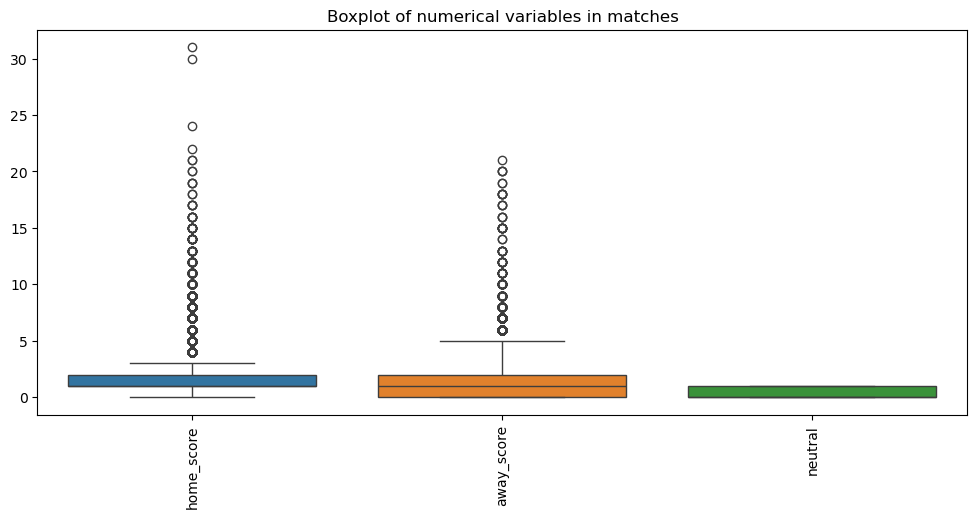

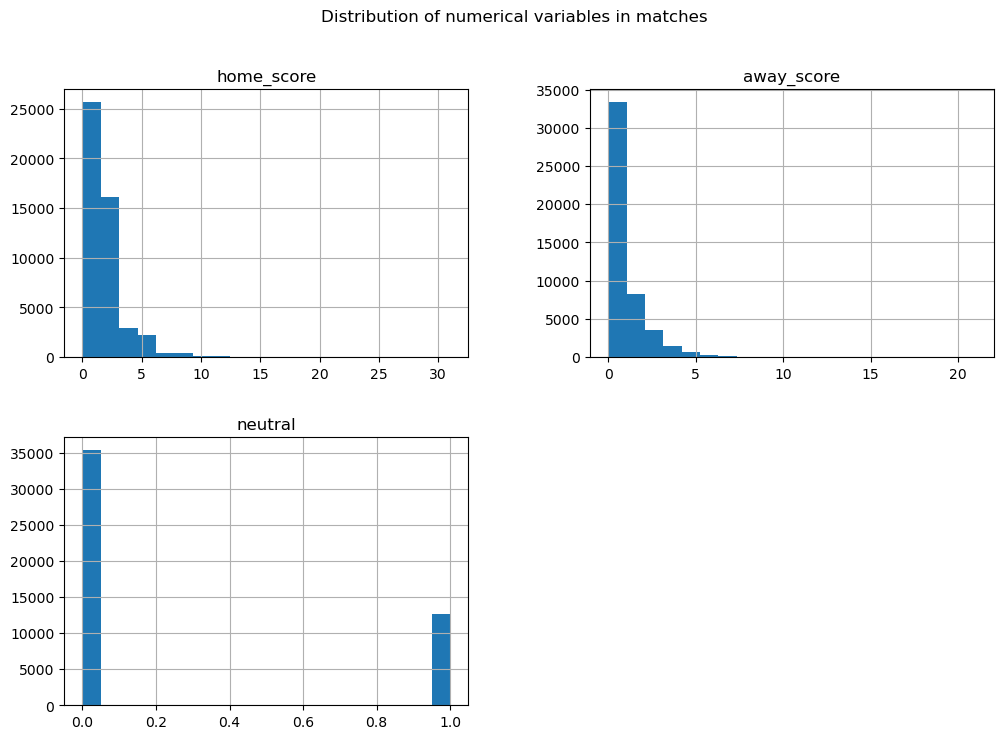

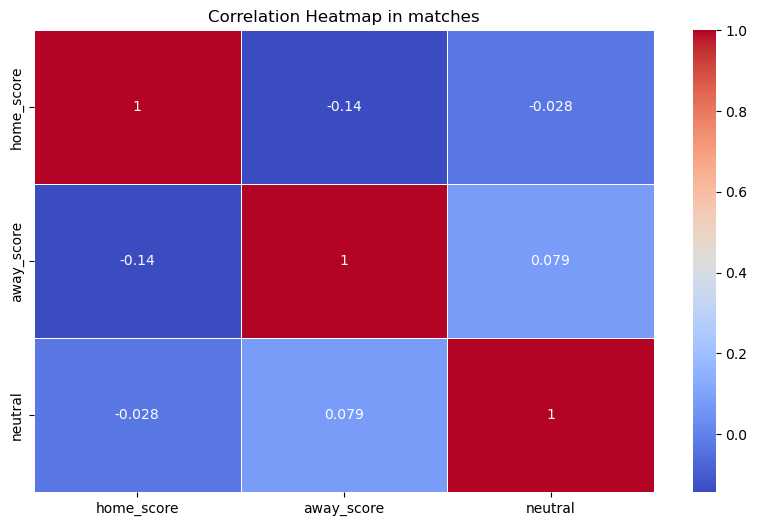


📊 Summary of table 'goals':


,minute,own_goal,penalty
count,44102.000000,44102.000000,44102.000000
mean,50.012652,0.018616,0.067117
std,26.358310,0.135166,0.250228
min,1.000000,0.000000,0.000000
25%,28.000000,0.000000,0.000000
50%,51.000000,0.000000,0.000000
75%,73.000000,0.000000,0.000000
max,122.000000,1.000000,1.000000


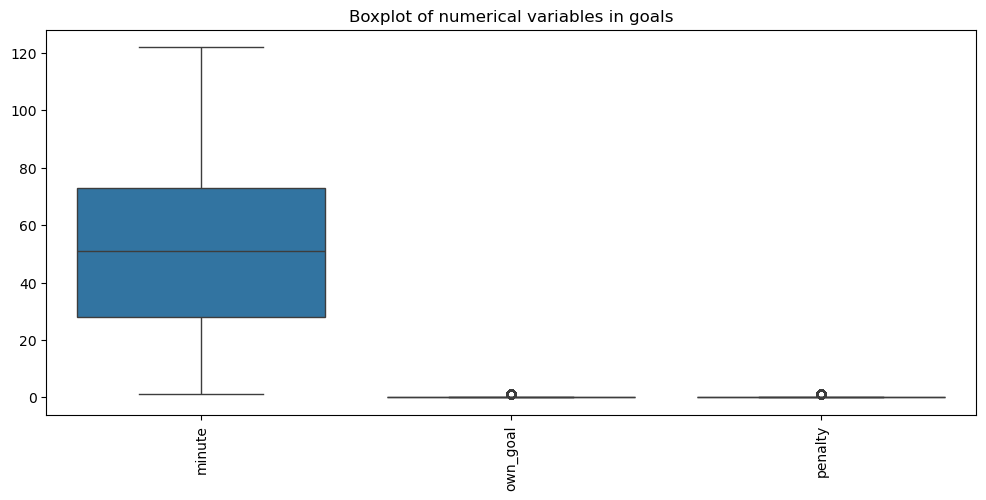

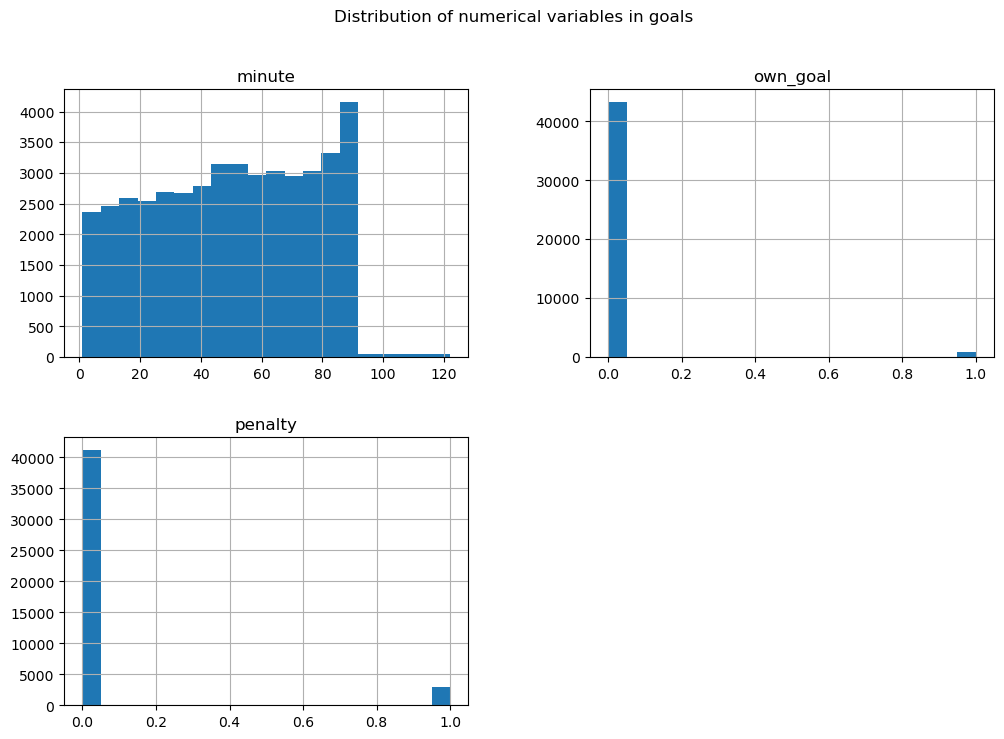

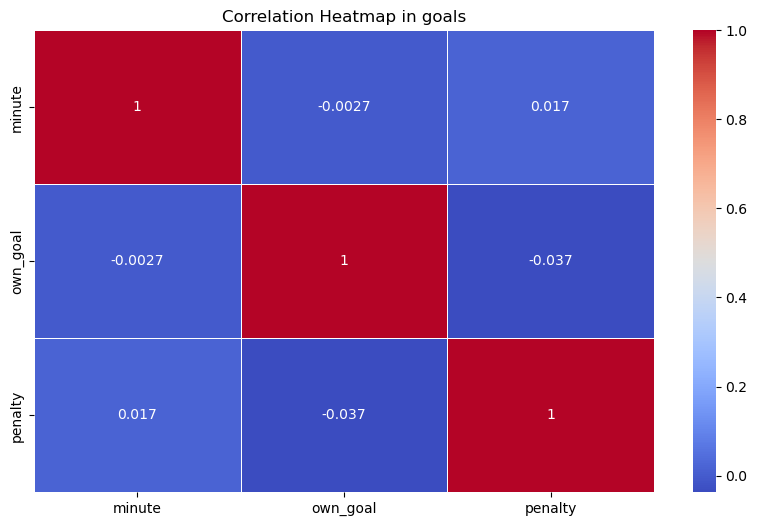

In [23]:
display_summary(df_matches, 'matches')
display_summary(df_goals, 'goals')

Goals Distribution per match

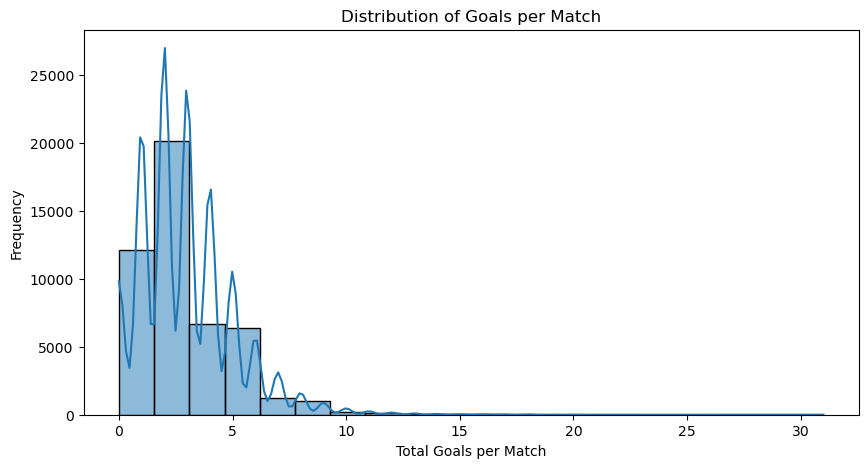

In [25]:
plt.figure(figsize=(10, 5))
sns.histplot(df_matches["home_score"] + df_matches["away_score"], bins=20, kde=True)
plt.title("Distribution of Goals per Match")
plt.xlabel("Total Goals per Match")
plt.ylabel("Frequency")
plt.show()

Number of Matches Played per Year

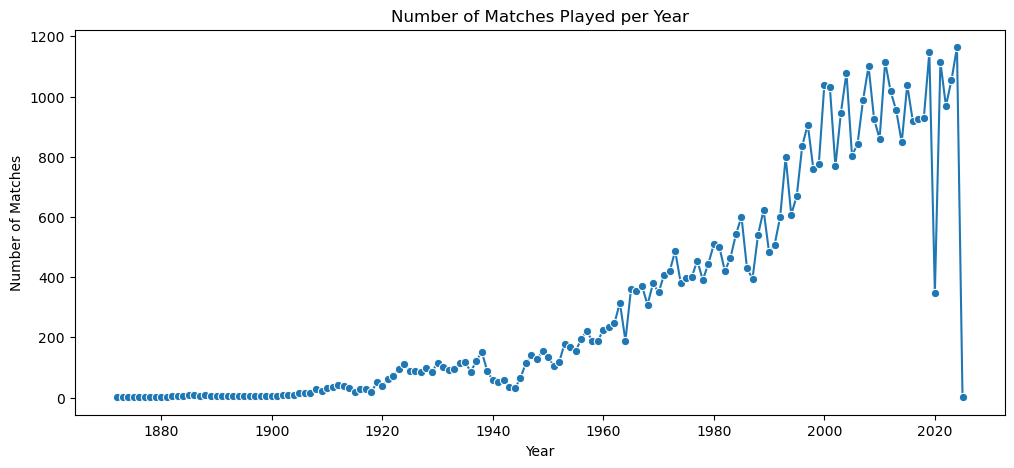

In [24]:
query = """
SELECT YEAR(date) AS year, COUNT(*) AS total_matches
FROM matches
GROUP BY year
ORDER BY year;
"""
df_matches_per_year = run_query(query, connection)

plt.figure(figsize=(12, 5))
sns.lineplot(x="year", y="total_matches", data=df_matches_per_year, marker="o")
plt.title("Number of Matches Played per Year")
plt.xlabel("Year")
plt.ylabel("Number of Matches")
plt.show()


Teams with the Most Goals Scored

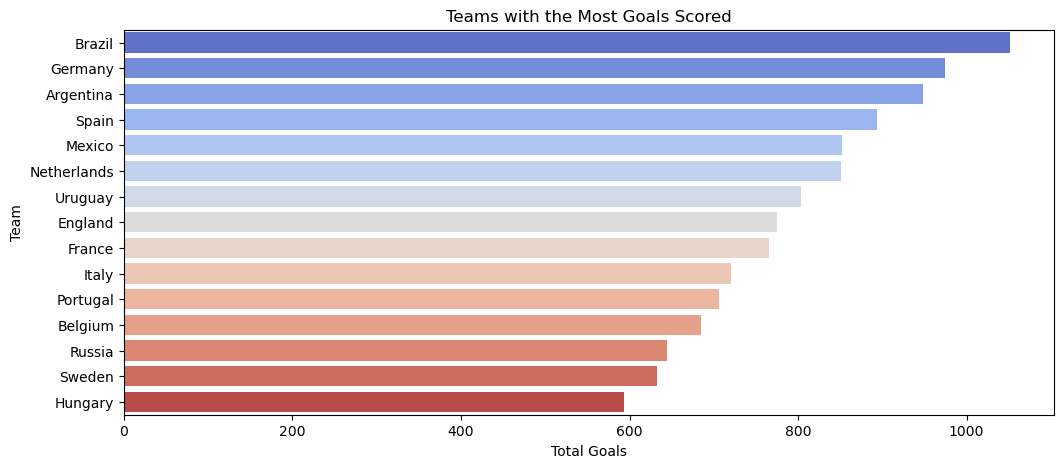

In [26]:
query = """
SELECT t.team_name, COUNT(*) AS total_goals
FROM goals g
JOIN teams t ON g.team_id = t.team_id
GROUP BY t.team_name
ORDER BY total_goals DESC
LIMIT 15;
"""
df_top_scorer_teams = run_query(query, connection)

plt.figure(figsize=(12, 5))
sns.barplot(x="total_goals", y="team_name", data=df_top_scorer_teams, hue="team_name", palette="coolwarm", legend=False)
plt.title("Teams with the Most Goals Scored")
plt.xlabel("Total Goals")
plt.ylabel("Team")
plt.show()

Relationship Between Home and Away Goals

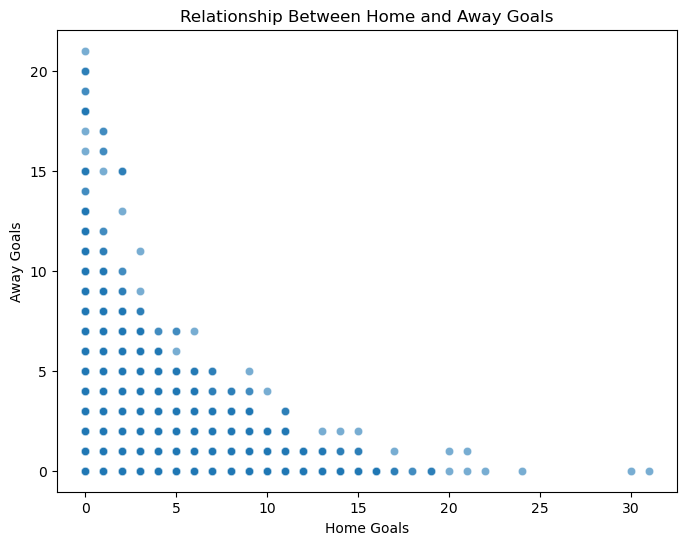

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_matches["home_score"], y=df_matches["away_score"], alpha=0.6)
plt.title("Relationship Between Home and Away Goals")
plt.xlabel("Home Goals")
plt.ylabel("Away Goals")
plt.show()
